In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
IRS_data = pd.read_csv('/Users/chrislele/Downloads/IRSIncomeByZipCode.csv')

In [3]:
IRS_data.head()

STATE  ZIPCODE  Number of returns  Adjusted gross income (AGI)    Avg AGI  \
0    AL        0            2022380                    105089761  51.963410   
1    AL    35004               4930                       255534  51.832454   
2    AL    35005               3300                       128387  38.905152   
3    AL    35006               1230                        58302  47.400000   
4    AL    35007              11990                       643708  53.687073   

   Number of returns with total income  Total income amount  Avg total income  \
0                              2022380            106420533         52.621433   
1                                 4930               258024         52.337525   
2                                 3300               129390         39.209091   
3                                 1230                58585         47.630081   
4                                11990               651350         54.324437   

   Number of returns with taxable income  Taxable income amount  \
0                                1468370               67850874   
1                                   4020                 163859   
2                                   2440                  70760   
3                                    940                  36341   
4                                   9280                 414878   

   Avg taxable income  
0           46.208295  
1           40.760945  
2           29.000000  
3           38.660638  
4           44.706681

In [4]:
SAT_info = pd.read_csv('/Users/chrislele/Downloads/scores.csv')

In [5]:
SAT_info.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   

                                                                           2    \
School ID                                                               01M539   
School Name                  New Explorations into Science, Technology and ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                    

In [6]:
nyc_zipcodes = SAT_info['Zip Code'].unique()

filtered_irs_data = IRS_data[IRS_data['ZIPCODE'].isin(nyc_zipcodes)][['ZIPCODE', 'Avg total income']]
filtered_irs_data.rename(columns={'ZIPCODE': 'Zip Code'}, inplace=True)

merged_data = SAT_info.merge(filtered_irs_data, on='Zip Code', how='left')

In [7]:
merged_data.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   

                                                                           2    \
School ID                                                               01M539   
School Name                  New Explorations into Science, Technology and ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia 

In [8]:
missing = pd.concat([merged_data.isnull().sum(), 100 * merged_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

count          %
Average Score (SAT Writing)     60  13.793103
Average Score (SAT Reading)     60  13.793103
Average Score (SAT Math)        60  13.793103
Percent Tested                  49  11.264368
Percent Asian                    7   1.609195
Percent Hispanic                 7   1.609195
Percent Black                    7   1.609195
Percent White                    7   1.609195
Student Enrollment               7   1.609195
Start Time                       4   0.919540
End Time                         4   0.919540
School ID                        0   0.000000
School Name                      0   0.000000
Phone Number                     0   0.000000
Longitude                        0   0.000000
Latitude                         0   0.000000
Zip Code                         0   0.000000
State                            0   0.000000
City                             0   0.000000
Street Address                   0   0.000000
Building Code                    0   0.000000
Borough                          0   0.000000
Avg total income                 0   0.000000

In [9]:
NYC_Housing = pd.read_csv('/Users/chrislele/Downloads/NYC Housing Sales.csv')

In [10]:
NYC_Housing.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [11]:
NYC_Housing.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [12]:
import numpy as np

# Replace '-' with NaN
NYC_Housing['SALE PRICE'] = NYC_Housing['SALE PRICE'].replace('-', np.nan)

# Count non-null values
non_null_values = NYC_Housing['SALE PRICE'].notnull().sum()

# Count null values
null_values = len(NYC_Housing) - non_null_values

print("Number of null values in 'SALE PRICE':", null_values)

Number of null values in 'SALE PRICE': 0


In [13]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_1000 = len(NYC_Housing[NYC_Housing['SALE PRICE'] > 1000])

print("Number of values greater than 1000 in 'SALE PRICE':", count_greater_than_1000)

Number of values greater than 1000 in 'SALE PRICE': 58604


In [14]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_100 = len(NYC_Housing[NYC_Housing['GROSS SQUARE FEET'] > 100])

print("Number of values greater than 100 in 'GROSS SQUARE FEET':", count_greater_than_100)

Number of values greater than 100 in 'GROSS SQUARE FEET': 45514


In [15]:
# Convert 'SALE PRICE' and 'GROSS SQUARE FEET' columns to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Create 'Avg_price_sqft' column by dividing 'SALE PRICE' by 'GROSS SQUARE FEET'
NYC_Housing['Avg_price_sqft'] = NYC_Housing['SALE PRICE'] / NYC_Housing['GROSS SQUARE FEET']

In [16]:
# Remove NaN values from 'Avg_price_sqft' column
NYC_Housing_cleaned = NYC_Housing.dropna(subset=['Avg_price_sqft'])

# View head of cleaned DataFrame
NYC_Housing_cleaned['Avg_price_sqft'].head(50)

0      1028.726708
3       579.374742
4      1733.477790
6       755.522953
9       876.315932
11      838.056680
22      709.346686
73      767.712218
172     982.142857
173    1286.554922
174    1279.288985
195    1031.790296
206    1926.070039
207       0.001769
208       0.001769
209       0.001769
212    1556.850141
214    2228.187919
216    4253.056885
218    2058.823529
219    1638.888889
220    2629.848784
221    1079.963235
222     250.211690
223      65.843602
224      99.584518
227    3442.622951
230     843.137255
231     868.192581
232     965.575147
233     850.000000
234     231.248743
239      29.689600
277      23.114754
831    2025.228325
832       0.002995
834    1855.183270
928    4240.196078
929    3016.505407
931    1326.705701
932     990.243902
937    1360.759494
938    2255.866206
940    5263.157895
941    2715.189873
943    2481.854367
945     933.333333
947    2305.064322
949     726.088583
950    1143.075690
Name: Avg_price_sqft, dtype: float64

In [17]:
NYC_Housing_filtered = NYC_Housing[NYC_Housing['Avg_price_sqft'] >= 20]
NYC_Housing_filtered.head(100)

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0              4        1  ALPHABET CITY   
3              7        1  ALPHABET CITY   
4              8        1  ALPHABET CITY   
6             10        1  ALPHABET CITY   
9             13        1  ALPHABET CITY   
...          ...      ...            ...   
2050        2054        1        FASHION   
2051        2055        1        FASHION   
2058        2062        1        FASHION   
2059        2063        1        FASHION   
2064        2068        1        FASHION   

                          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0     07 RENTALS - WALKUP APARTMENTS                                2A    392   
3     07 RENTALS - WALKUP APARTMENTS                                2B    402   
4     07 RENTALS - WALKUP APARTMENTS                                2A    404   
6     07 RENTALS - WALKUP APARTMENTS                                2B    406   
9     08 RENTALS - ELEVATOR APARTMENTS                               2    387   
...                                           ...                  ...    ...   
2050  21 OFFICE BUILDINGS                                            4    833   
2051  21 OFFICE BUILDINGS                                            4    838   
2058  23 LOFT BUILDINGS                                              4    762   
2059  23 LOFT BUILDINGS                                              4    785   
2064  25 LUXURY HOTELS                                               4    760   

      LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0       6                                  C2            153 AVENUE B  ...   
3      21                                  C4     154 EAST 7TH STREET  ...   
4      55                                  C2  301 EAST 10TH   STREET  ...   
6      32                                  C4            210 AVENUE B  ...   
9     153                                  D9     629 EAST 5TH STREET  ...   
...   ...       ...                       ...                     ...  ...   
2050   11                                  O4           1250 BROADWAY  ...   
2051   12                                  O6   53 WEST 36TH   STREET  ...   
2058   61                                  L1  338 WEST 39TH   STREET  ...   
2059   75                                  L3  260 WEST 36TH   STREET  ...   
2064   18                                  H2  341 WEST 36TH   STREET  ...   

     COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                   0            5              1633             6440.0   
3                   0           10              2272             6794.0   
4                   0            6              2369             4615.0   
6                   0            8              1750             4226.0   
9                   0           24              4489            18523.0   
...               ...          ...               ...                ...   
2050               55           55             30750           645977.0   
2051               17           17              5925            64300.0   
2058               12           12              4937            55473.0   
2059               12           12              7266            81375.0   
2064                1            1              7406            81000.0   

      YEAR BUILT TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0           1900                         2                              C2   
3           1913                         2                              C4   
4           1900                         2                              C2   
6           1920                         2                              C4   
9           1920                         2                              D9   
...          ...                       ...                             ...   
2050        1969                         4                              O4   
2051        1911                         4

In [18]:
print(merged_data.columns)
print(NYC_Housing.columns)

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [19]:
# Rename 'ZIP CODE' column to 'Zip Code' in NYC_Housing
NYC_Housing.rename(columns={'ZIP CODE': 'Zip Code'}, inplace=True)

In [20]:
# Select columns from NYC_Housing
columns_to_merge = ['BUILDING CLASS AT PRESENT', 'TOTAL UNITS', 'Zip Code','GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE', 'Avg_price_sqft']

# Merge DataFrames
#merged_data = merged_data.merge(NYC_Housing[columns_to_merge], on='Zip Code', how='left')

md = merged_data.merge(NYC_Housing[columns_to_merge].groupby('Zip Code').median().reset_index(), on='Zip Code', how='left')

# View head of the merged DataFrame
#merged_data.head()
md.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   
TOTAL UNITS                                                 1.0   
GROSS SQUARE FEET                                       19453.0   
SALE PRICE                                            1750000.0   
Avg_price_sqft                                       990.243902   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                         

In [21]:
ST_ratio = pd.read_csv('/Users/chrislele/Downloads/2015_-_2016_Final_Class_Size_Report_Pupil-to-Teacher_Ratio__PTR_.csv')



In [22]:
ST_ratio.columns

Index(['DBN', 'School Name', 'School Pupil-Teacher Ratio'], dtype='object')

In [23]:
md['School Name'] = md['School Name'].apply(lambda x: x.upper())

In [24]:
# Assuming 'ST_ratio' is the DataFrame containing the 'School Pupil-Teacher Ratio' column
md_merged_data = md.merge(ST_ratio[['School Name', 'School Pupil-Teacher Ratio']], on='School Name', how='left')

In [25]:
df_unmatched = pd.DataFrame(md_merged_data[md_merged_data['School Pupil-Teacher Ratio'].isnull()]['School Name'].unique())

In [26]:
df_unmatched = df_unmatched.rename(columns={0: 'School Name'})
df_unmatched['New Name'] = ''
df_unmatched

School Name New Name
0                  CLINTON SCHOOL WRITERS AND ARTISTS         
1        URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW         
2              HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY         
3   URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN         
4   47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...         
..                                                ...      ...
85  QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...         
86          YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS         
87                  QUEENS COLLEGIATE (COLLEGE BOARD)         
88                  HILLSIDE ARTS AND LETTERS ACADEMY         
89      ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD)         

[90 rows x 2 columns]

In [27]:
df_unmatched.to_csv('lookup_names_missing.csv')

<AxesSubplot:xlabel='Average Score (SAT Math)', ylabel='School Pupil-Teacher Ratio'>

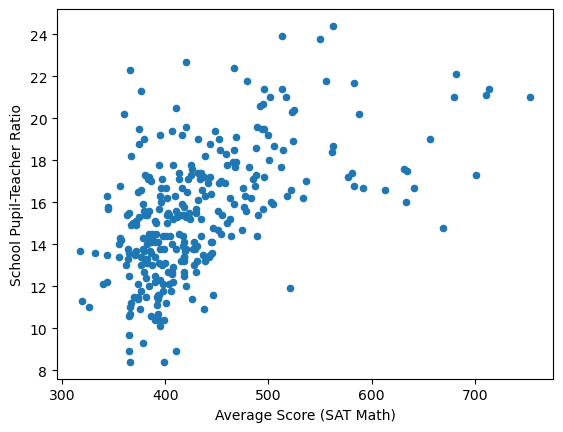

In [28]:
md_merged_data.plot(x="Average Score (SAT Math)", y="School Pupil-Teacher Ratio", kind='scatter')

In [29]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("ACADEMY OF MEDICAL TECHNOLOGY")

DBN                                        School Name  \
1276  27Q309  ACADEMY OF MEDICAL TECHNOLOGY: A COLLEGE BOARD...   

      School Pupil-Teacher Ratio  
1276                        12.8

In [30]:
Edited_File = pd.read_csv('/Users/chrislele/Downloads/lookup_names_missing.csv')

In [31]:
df_unmatched['School Name'].update(Edited_File['School Name'])
print(df_unmatched['School Name'].head())

0                   CLINTON SCHOOL WRITERS AND ARTISTS
1         URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW
2               HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
3    URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN
4    47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...
Name: School Name, dtype: object


In [32]:
nan_count = df_unmatched['School Name'].isna().sum()
print("Number of NaN values in 'School Name' column: ", nan_count)

Number of NaN values in 'School Name' column:  0


In [33]:
df_unmatched.head(100)

School Name New Name
0                  CLINTON SCHOOL WRITERS AND ARTISTS         
1        URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW         
2              HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY         
3   URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN         
4   47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...         
..                                                ...      ...
85  QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...         
86          YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS         
87                  QUEENS COLLEGIATE (COLLEGE BOARD)         
88                  HILLSIDE ARTS AND LETTERS ACADEMY         
89      ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD)         

[90 rows x 2 columns]

In [34]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("NYC LAB SCHOOL FOR COLLABORATIVE STUDIES")

Empty DataFrame
Columns: [DBN, School Name, School Pupil-Teacher Ratio]
Index: []

In [35]:
print(df_unmatched.columns)

Index(['School Name', 'New Name'], dtype='object')


In [36]:
md_merged_data[(md_merged_data['Average Score (SAT Math)'].isnull())] 

School ID                                        School Name    Borough  \
0      02M260                 CLINTON SCHOOL WRITERS AND ARTISTS  Manhattan   
1      06M211  INWOOD EARLY COLLEGE FOR HEALTH AND INFORMATIO...  Manhattan   
15     02M546                   ACADEMY FOR SOFTWARE ENGINEERING  Manhattan   
16     02M533           UNION SQUARE ACADEMY FOR HEALTH SCIENCES  Manhattan   
28     02M047  47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...  Manhattan   
31     02M422                                     QUEST TO LEARN  Manhattan   
33     02M534                     HARVEST COLLEGIATE HIGH SCHOOL  Manhattan   
36     02M605                     HUMANITIES PREPARATORY ACADEMY  Manhattan   
42     02M432                                MURRAY HILL ACADEMY  Manhattan   
49     02M135     URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGEMENT  Manhattan   
62     03M859                               SPECIAL MUSIC SCHOOL  Manhattan   
77     04M372                      ESPERANZA PREPARATORY ACADEMY  Manhattan   
85     06M423          HIGH SCHOOL FOR EXCELLENCE AND INNOVATION  Manhattan   
86     05M157          URBAN ASSEMBLY SCHOOL FOR GLOBAL COMMERCE  Manhattan   
91     02M280     MANHATTAN EARLY COLLEGE SCHOOL FOR ADVERTISING  Manhattan   
93     02M282                       URBAN ASSEMBLY MAKER ACADEMY  Manhattan   
94     02M139  STEPHEN T. MATHER BUILDING ARTS AND CRAFTSMANS...  Manhattan   
116    07X522              BRONX DESIGN AND CONSTRUCTION ACADEMY      Bronx   
125    09X327                 COMPREHENSIVE MODEL SCHOOL PROJECT      Bronx   
127    07X223        LABORATORY SCHOOL OF FINANCE AND TECHNOLOGY      Bronx   
130    07X520         FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES      Bronx   
132    07X259  HERO HIGH (HEALTH, EDUCATION, AND RESEARCH OCC...      Bronx   
137    08X559                 SCHOOL FOR TOURISM AND HOSPITALITY      Bronx   
146    09X564                CLAREMONT INTERNATIONAL HIGH SCHOOL      Bronx   
150    09X276                               LEADERSHIP INSTITUTE      Bronx   
151    09X350                    NEW DIRECTIONS SECONDARY SCHOOL      Bronx   
160    10X524                  CROTONA INTERNATIONAL HIGH SCHOOL      Bronx   
162    10X264      BRONX ACADEMY FOR SOFTWARE ENGINEERING (BASE)      Bronx   
165    10X565              HIGH SCHOOL FOR ENERGY AND TECHNOLOGY      Bronx   
179    08X348              SCHUYLERVILLE PREPARATORY HIGH SCHOOL      Bronx   
181    08X558                         WESTCHESTER SQUARE ACADEMY      Bronx   
182    08X320                             PELHAM LAB HIGH SCHOOL      Bronx   
184    08X349                            BRONX RIVER HIGH SCHOOL      Bronx   
206    10X353                             WORLD VIEW HIGH SCHOOL      Bronx   
211    10X351                    BRONX COLLABORATIVE HIGH SCHOOL      Bronx   
226    08X432                          BRONX BRIDGES HIGH SCHOOL      Bronx   
229    08X561                          BRONX COMPASS HIGH SCHOOL      Bronx   
250    30Q258                            ENERGY TECH HIGH SCHOOL     Queens   
254    15K423                     BROOKLYN FRONTIERS HIGH SCHOOL   Brooklyn   
264    17K745                BROOKLYN INSTITUTE FOR LIBERAL ARTS   Brooklyn   
278    14K322                                FOUNDATIONS ACADEMY   Brooklyn   
279    14K614        YOUNG WOMEN'S LEADERSHIP SCHOOL OF BROOKLYN   Brooklyn   
291    19K764  URBAN ASSEMBLY SCHOOL FOR COLLABORATIVE HEALTH...   Brooklyn   
292    19K422                      SPRING CREEK COMMUNITY SCHOOL   Brooklyn   
311    16K765           NELSON MANDELA SCHOOL FOR SOCIAL JUSTICE   Brooklyn   
324    15K592                KHALIL GIBRAN INTERNATIONAL ACADEMY   Brooklyn   
332    16K393     FREDERICK DOUGLASS ACADEMY IV SECONDARY SCHOOL   Brooklyn   
355    23K644                     EAGLE ACADEMY FOR YOUNG MEN II   Brooklyn   
358    22K611                                ORIGINS HIGH SCHOOL   Brooklyn   
368    32K168              BROOKLYN SCHOOL FOR MATH AN

In [37]:
new_data = md_merged_data.dropna()

In [38]:
new_data.shape

(298, 28)

In [39]:
new_data.head()

School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \
2  -73.97943  ...                    657.0                       601.0   
3  -73.98953  ...                    395.0                       411.0   
4  -73.98953  ...                    418.0                       428.0   
5  -73.98953  ...                    613.0                       453.0   
6  -73.98526  ...                    410.0                       406.0   

  Average Score (SAT Writing)  Percent Tested Avg total income TOTAL UNITS  \
2                       601.0           91.0%        46.846786         0.0   
3                       387.0           78.9%        46.846786         0.0   
4                       415.0           65.1%        46.846786         0.0   
5                       463.0           95.9%        46.846786         0.0   
6                       381.0           59.7%        46.846786         0.0   

  GROSS SQUARE FEET SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  
2           10230.0   845000.0     1016.835017                        19.0  
3           10230.0   845000.0     1016.835017                        13.8  
4           10230.0   845000.0     1016.835017                        13.4  
5           10230.0   845000.0     1016.835017                        16.6  
6           10230.0   845000.0     1016.835017                         8.9  

[5 rows x 28 columns]

In [40]:
new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head)

<bound method NDFrame.head of     School ID                                        School Name    Borough  \
2      01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3      02M294                               ESSEX STREET ACADEMY  Manhattan   
4      02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5      02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6      01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   
..        ...                                                ...        ...   
430    27Q302  QUEENS HIGH SCHOOL FOR INFORMATION, RESEARCH, ...     Queens   
431    27Q324  ROCKAWAY PARK HIGH SCHOOL FOR ENVIRONMENTAL SU...     Queens   
432    27Q262                   CHANNEL VIEW SCHOOL FOR RESEARCH     Queens   
433    27Q351                    ROCKAWAY COLLEGIATE HIGH SCHOOL     Queens   
434    27Q323                                  SCHOLARS' ACADEMY     Queens   

    Building Code    

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_63022/292681075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100


In [41]:
new_data.T

2    \
School ID                                                               01M539   
School Name                  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.71873   
Longitude                                                            -73.97943   
Phone Number                                                      212-677-5190   
Start Time                                                             8:15 AM   
End Time                                                               4:00 PM   
Student Enrollment                                                      1735.0   
Percent White                                                            28.6%   
Percent Black                                                            13.3%   
Percent Hispanic                                                         18.0%   
Percent Asian                                                            38.5%   
Average Score (SAT Math)                                                 657.0   
Average Score (SAT Reading)                                              601.0   
Average Score (SAT Writing)                                              601.0   
Percent Tested                                                            0.91   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                                            845000.0   
Avg_price_sqft                                                     1016.835017   
School Pupil-Teacher Ratio                                                19.0   

                                              3    \
School ID                                  02M294   
School Name                  ESSEX STREET ACADEMY   
Borough                                 Manhattan   
Building Code                                M445   
Street Address                   350 Grand Street   
City                                    Manhattan   
State                                          NY   
Zip Code                                    10002   
Latitude                                 40.71687   
Longitude                               -73.98953   
Phone Number                         212-475-4773   
Start Time                                8:00 AM   
End Time                                  2:45 PM   
Student Enrollment                          358.0   
Percent White                               11.7%   
Percent Black                               38.5%   
Percent Hispanic                            41.3%   
Percent Asian                                5.9%   
Average Score (SAT Math)                    395.0   
Average Score (SAT Reading)                 411.0   
Average Score (SAT Writing)                 387.0   
Percent Tested                              0.789   
Avg total income                        46.846786   
TOTAL UNITS                                   0.0   
GROSS SQUARE FEET                         10230.0   
SALE PRICE                               845000.0   
Avg_price_sqft                        1016.835017   
School Pupil-Teacher Ratio                   13.8   

                                                      4    \
School ID                                          02M308   
School Name                  LOWER M

In [42]:
new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
new_data['Percent Hispanic'] = new_data['Percent Hispanic'].str.replace('%', '').astype(float) / 100
new_data['Percent Asian'] = new_data['Percent Asian'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head())

  School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \


/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_63022/3860259273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_63022/3860259273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_63022/3

In [43]:
new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']


/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_63022/1820197861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']


In [44]:
grouped_data = new_data.groupby('Zip Code').agg({
    'Avg total income': 'mean',
    'Avg_price_sqft': 'mean',
    'Average Score (SAT Math)': 'mean',
    'Average Score (SAT Reading)': 'mean',
    'Average Score (SAT Writing)': 'mean',
    'GROSS SQUARE FEET': 'mean',
    'SALE PRICE': 'mean',
    'School Pupil-Teacher Ratio': 'mean',
    'Percent Tested': 'mean',
    'Percent White': 'mean',
    'Percent Black': 'mean',
    'Percent Hispanic': 'mean',
    'Percent Asian': 'mean',
    'Student Enrollment': 'mean',
    'SAT Cumulative Score': 'mean'  
})

# Display the grouped data
grouped_data.head()

Avg total income  Avg_price_sqft  Average Score (SAT Math)  \
Zip Code                                                               
10002            46.846786     1016.835017                     481.3   
10003           212.309032     1103.710015                     450.5   
10004           350.689535      696.494817                     478.0   
10006           181.589407     1563.542836                     429.5   
10009            72.640410      892.857143                     454.0   

          Average Score (SAT Reading)  Average Score (SAT Writing)  \
Zip Code                                                             
10002                           453.9                        443.1   
10003                           446.0                        435.5   
10004                           476.0                        468.0   
10006                           419.0                        419.5   
10009                           428.0                        445.0   

          GROSS SQUARE FEET  SALE PRICE  School Pupil-Teacher Ratio  \
Zip Code                                                              
10002               10230.0    845000.0                      14.080   
10003                7692.0   1225000.0                      16.125   
10004              143730.0   1075000.0                      14.700   
10006              130054.0   2520168.0                      17.100   
10009                9464.0    952000.0                      14.500   

          Percent Tested  Percent White  Percent Black  Percent Hispanic  \
Zip Code                                                                   
10002            0.72840        0.10590        0.24850           0.39160   
10003            0.74575        0.19875        0.22425           0.38825   
10004            0.77600        0.18100        0.20800           0.42900   
10006            0.60850        0.05800        0.25400           0.54500   
10009            0.85200        0.08300        0.22100           0.57900   

          Percent Asian  Student Enrollment  SAT Cumulative Score  
Zip Code                                                           
10002          0.227500          522.300000                1378.3  
10003          0.156000          757.250000                1332.0  
10004          0.158333          557.333333                1422.0  
10006          0.128000          747.500000                1268.0  
10009          0.094000          666.000000                1327.0

In [45]:
new_data.head()

School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Reading) Average Score (SAT Writing)  \
2  -73.97943  ...                       601.0                       601.0   
3  -73.98953  ...                       411.0                       387.0   
4  -73.98953  ...                       428.0                       415.0   
5  -73.98953  ...                       453.0                       463.0   
6  -73.98526  ...                       406.0                       381.0   

  Percent Tested  Avg total income  TOTAL UNITS  GROSS SQUARE FEET  \
2          0.910         46.846786          0.0            10230.0   
3          0.789         46.846786          0.0            10230.0   
4          0.651         46.846786          0.0            10230.0   
5          0.959         46.846786          0.0            10230.0   
6          0.597         46.846786          0.0            10230.0   

   SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  \
2    845000.0     1016.835017                        19.0   
3    845000.0     1016.835017                        13.8   
4    845000.0     1016.835017                        13.4   
5    845000.0     1016.835017                        16.6   
6    845000.0     1016.835017                         8.9   

   SAT Cumulative Score  
2                1859.0  
3                1193.0  
4                1261.0  
5                1529.0  
6                1197.0  

[5 rows x 29 columns]

In [46]:
new_data = new_data.drop(columns=['Zip Code', 'Latitude', 'Longitude'], errors='ignore')

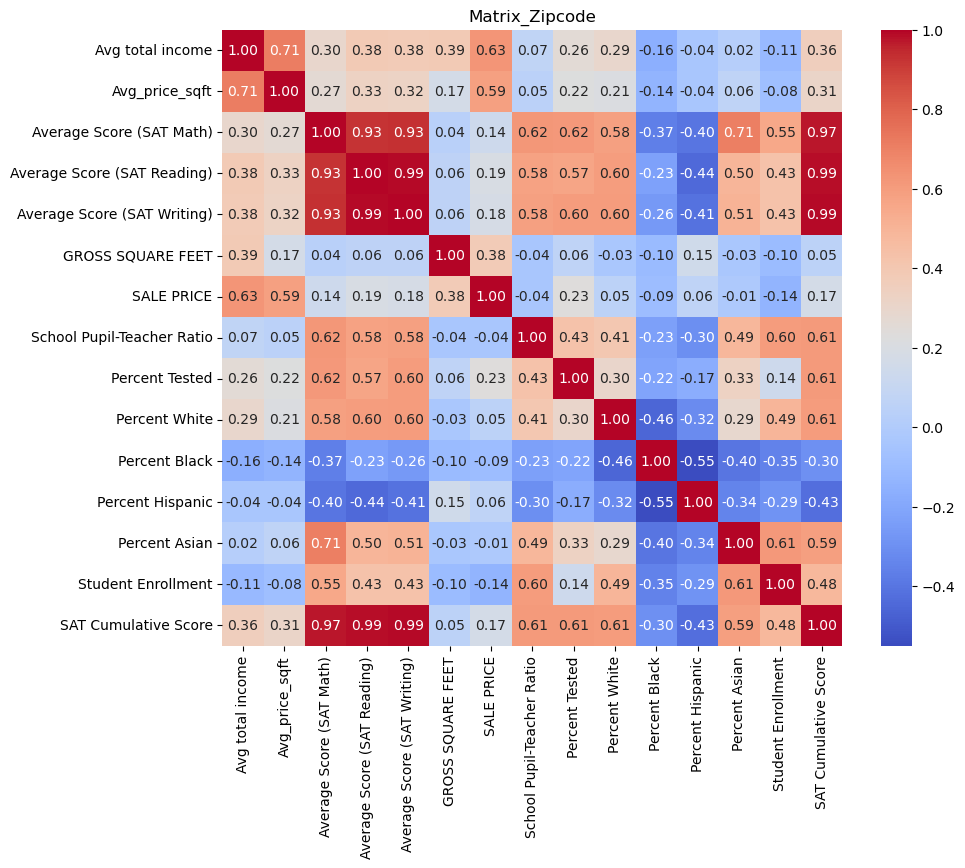

In [47]:
matrix_zipcode = grouped_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_zipcode, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix_Zipcode')
plt.show()

In [48]:
total_students = new_data['Percent Black'].sum() + new_data['Percent Hispanic'].sum() + new_data['Percent Asian'].sum() + new_data['Percent White'].sum()

black_percentage = (new_data['Percent Black'].sum() / total_students) * 100
hispanic_percentage = (new_data['Percent Hispanic'].sum() / total_students) * 100
asian_percentage = (new_data['Percent Asian'].sum() / total_students) * 100
white_percentage = (new_data['Percent White'].sum() / total_students) * 100

print(f"Black Students: {black_percentage:.2f}%")
print(f"Hispanic Students: {hispanic_percentage:.2f}%")
print(f"Asian Students: {asian_percentage:.2f}%")
print(f"White Students: {white_percentage:.2f}%")

Black Students: 34.77%
Hispanic Students: 45.32%
Asian Students: 10.81%
White Students: 9.09%


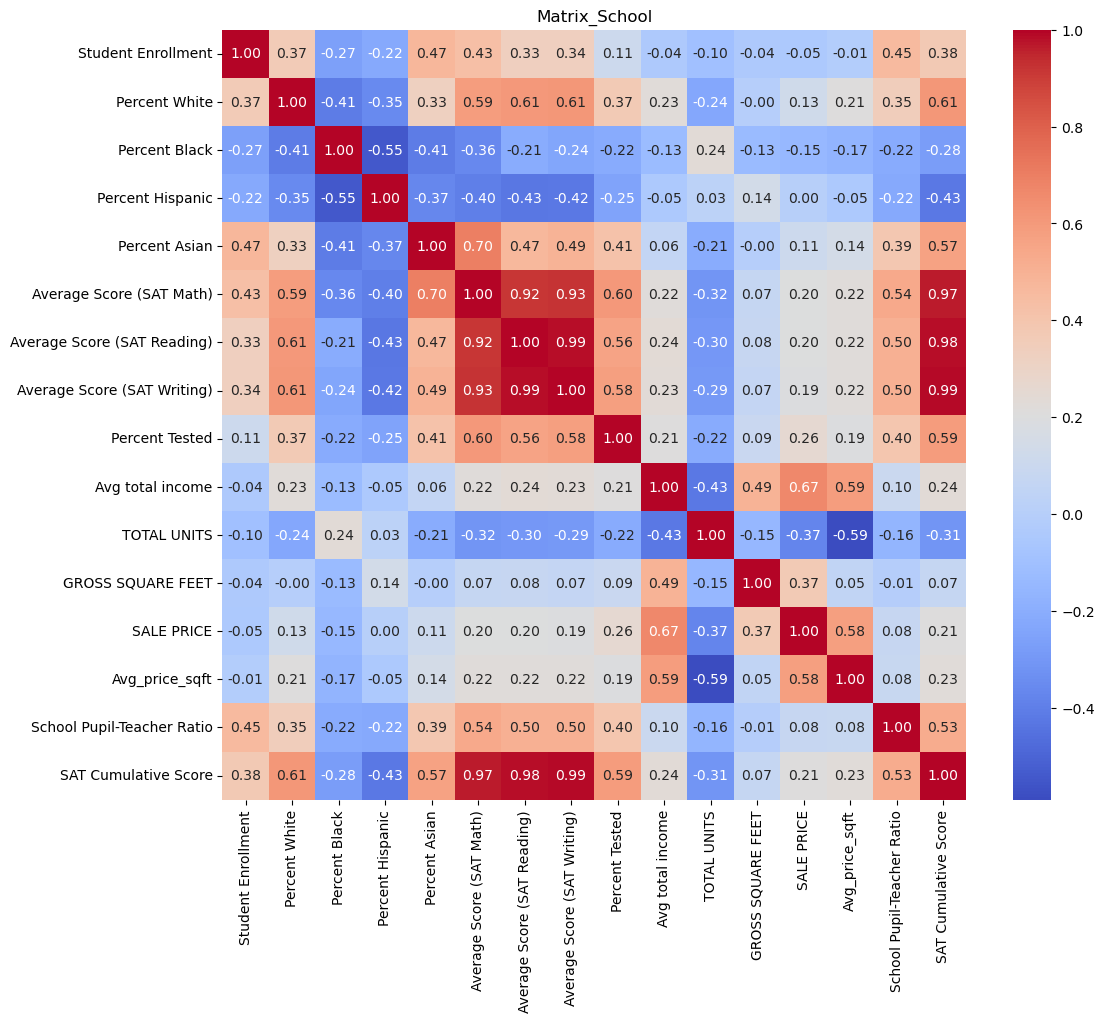

In [49]:
matrix_school = new_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matrix_school, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix_School')
plt.show()

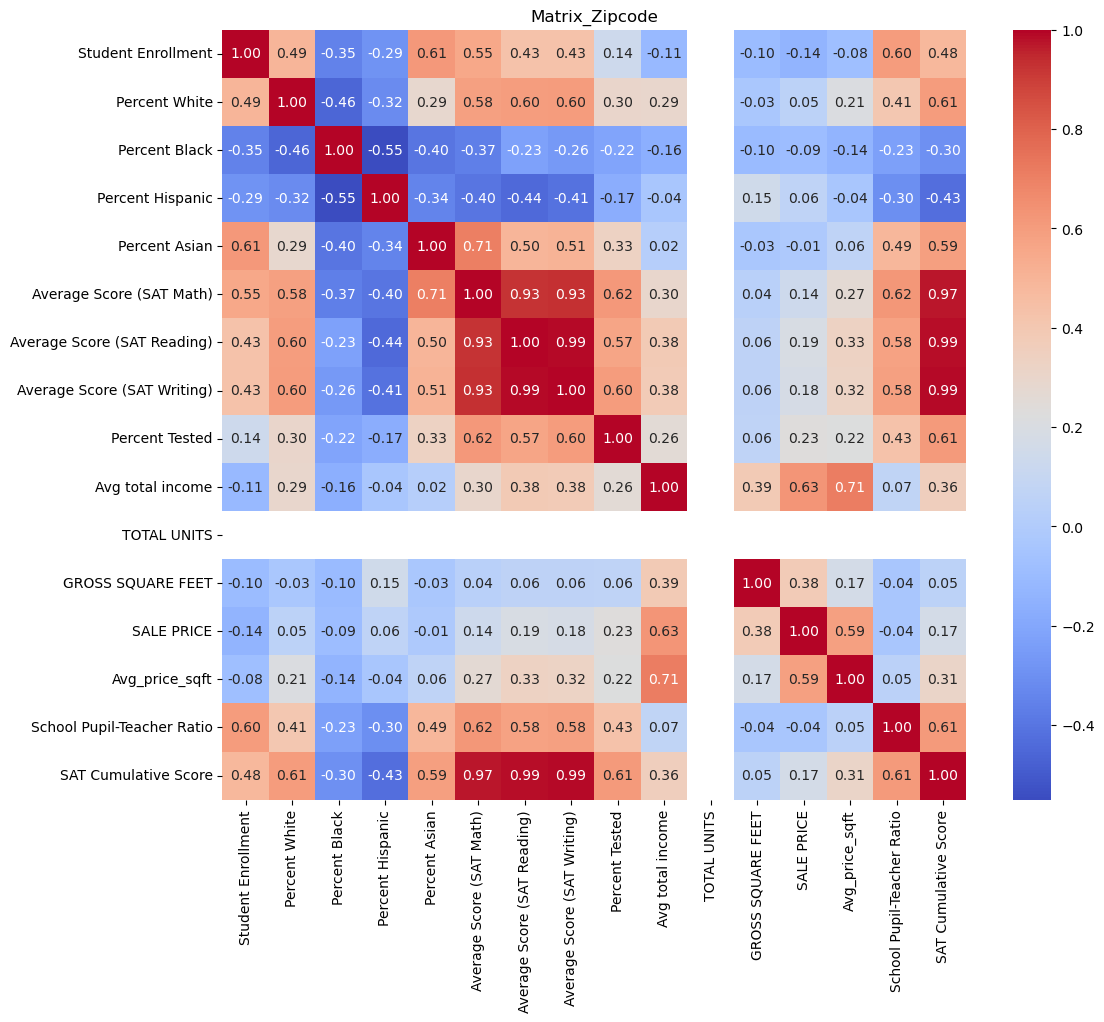

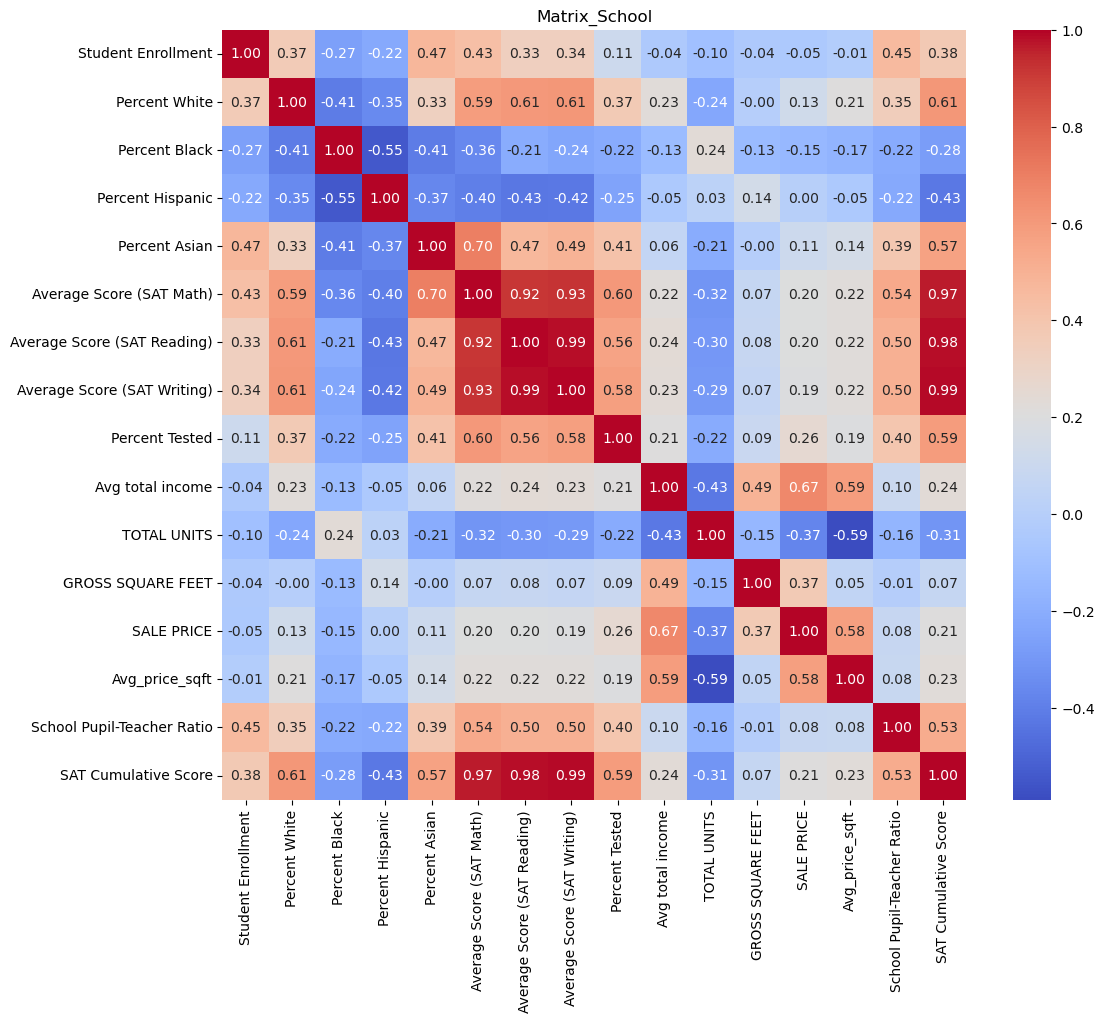

In [50]:
# Ensure the order of features in matrix_zipcode is the same as in matrix_school
matrix_zipcode = matrix_zipcode.reindex(matrix_school.columns).reindex(columns=matrix_school.columns)

# Plotting the heatmaps
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_zipcode, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix_Zipcode')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(matrix_school, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix_School')
plt.show()

In [51]:
import plotly.express as px

fig = px.scatter(new_data, 
                 x='Avg total income', 
                 y='SAT Cumulative Score', 
                 hover_data=['School Name'],
                 title='SAT Cumulative Score vs. Avg total income',
                 labels={'Avg total income': 'Avg total income', 'SAT Cumulative Score': 'SAT Cumulative Score'})

fig.show()

In [52]:
import plotly.express as px

fig = px.scatter(new_data, 
                 x='School Pupil-Teacher Ratio', 
                 y='SAT Cumulative Score', 
                 hover_data=['School Name'],
                 title='SAT Cumulative Score vs. School Pupil-Teacher Ratio',
                 labels={'School Pupil-Teacher Ratio': 'School Pupil-Teacher Ratio', 'SAT Cumulative Score': 'SAT Cumulative Score'})

fig.show()

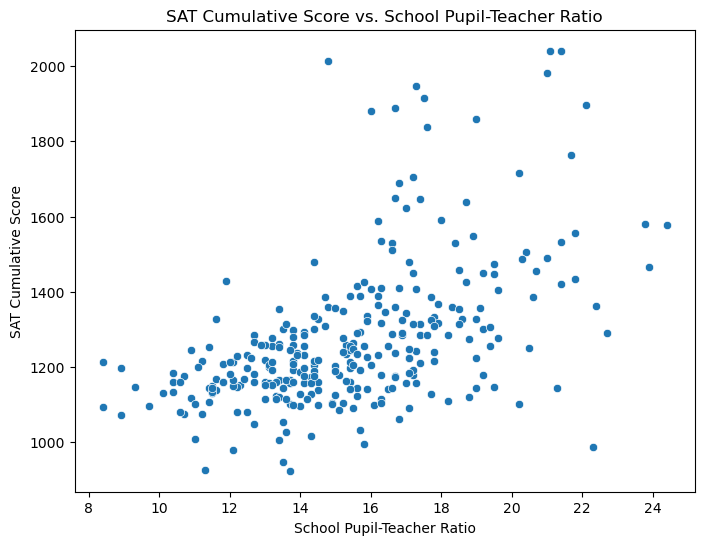

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', data=new_data)
plt.title('SAT Cumulative Score vs. School Pupil-Teacher Ratio')
plt.xlabel('School Pupil-Teacher Ratio')
plt.ylabel('SAT Cumulative Score')
plt.show()

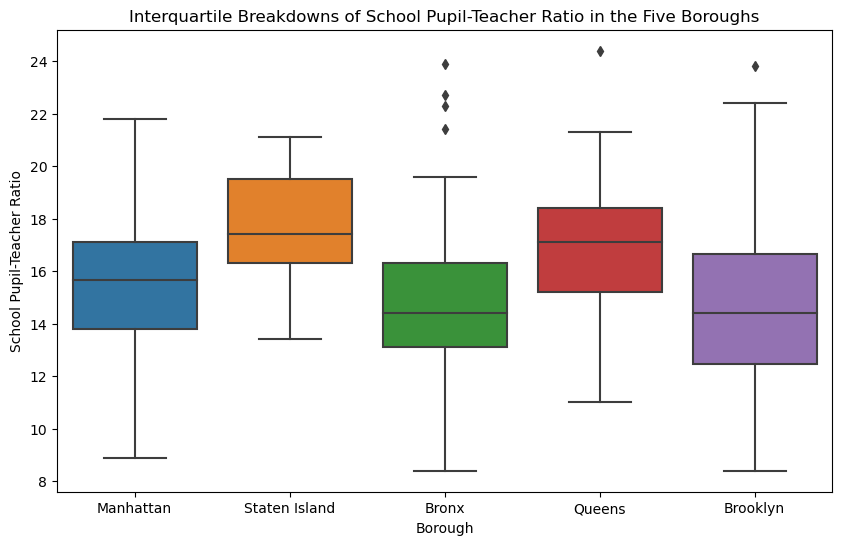

In [54]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data, x='Borough', y='School Pupil-Teacher Ratio')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('School Pupil-Teacher Ratio')
plt.title('Interquartile Breakdowns of School Pupil-Teacher Ratio in the Five Boroughs')

# Show the plot
plt.show()

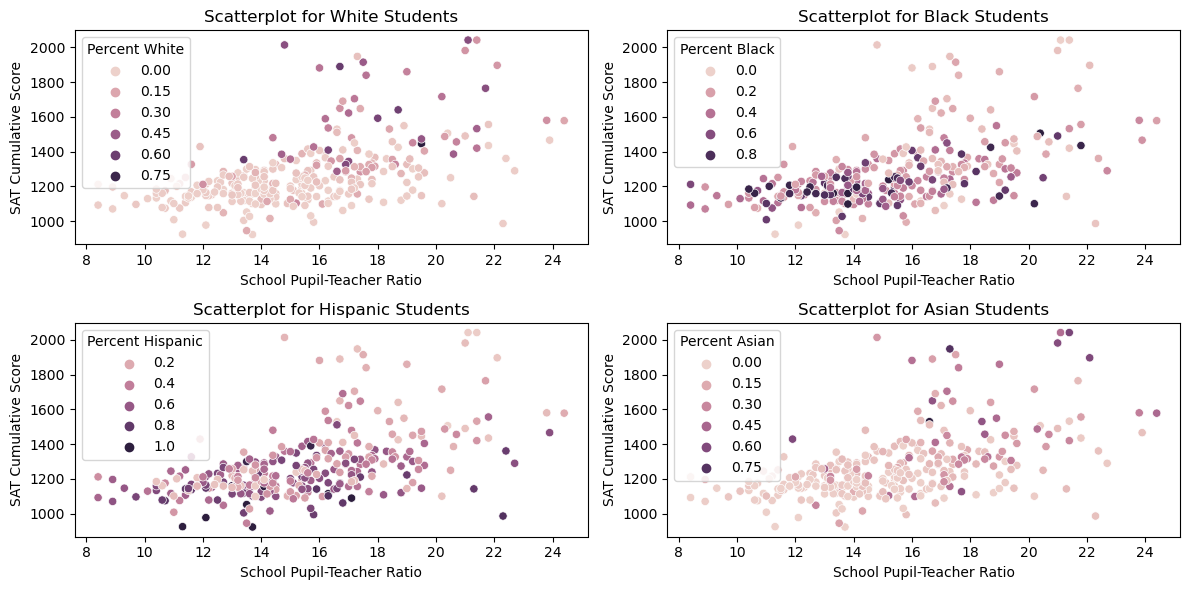

In [55]:
# Create scatterplot for White students
plt.figure(figsize=(12, 6))

# Create scatterplot for White students
plt.subplot(2, 2, 1)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent White')
plt.title("Scatterplot for White Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Black students
plt.subplot(2, 2, 2)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Black')
plt.title("Scatterplot for Black Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Hispanic students
plt.subplot(2, 2, 3)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Hispanic')
plt.title("Scatterplot for Hispanic Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Asian students
plt.subplot(2, 2, 4)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Asian')
plt.title("Scatterplot for Asian Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Adjust layout
plt.tight_layout()

# Show all scatterplots
plt.show()

In [56]:
def create_scatterplot_black(data, title):
    fig = px.scatter(data, 
                     x='School Pupil-Teacher Ratio', 
                     y='SAT Cumulative Score', 
                     color='Percent Black',
                     hover_data=['School Name', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score'],  # Add 'School Name' here
                     title=title,
                     color_continuous_scale='Viridis',
                     labels={'School Pupil-Teacher Ratio': 'School Pupil-Teacher Ratio',
                             'SAT Cumulative Score': 'SAT Cumulative Score'})
    
    # Show the plot
    fig.show()

# Filter data for black students
black_data = new_data[new_data['Percent Black'] >= .50]

# Create scatterplot for schools with 50% or more black students
create_scatterplot_black(black_data, "Scatterplot for Schools with 50% or More Black Students")









In [57]:
def create_scatterplot_black(data, title):
    fig = px.scatter(data, 
                     x='Percent Tested', 
                     y='SAT Cumulative Score', 
                     color='Percent Black',
                     hover_data=['School Name', 'Percent Tested', 'SAT Cumulative Score'],  # Add 'School Name' here
                     title=title,
                     color_continuous_scale='Viridis',
                     labels={'Percent Tested': 'Percent Tested',
                             'SAT Cumulative Score': 'SAT Cumulative Score'})
    
    # Show the plot
    fig.show()

# Filter data for black students
black_data = new_data[new_data['Percent Black'] >= .50]

# Create scatterplot for schools with 50% or more black students
create_scatterplot_black(black_data, "Scatterplot for Schools with 50% or More Black Students")



In [58]:
def create_scatterplot_hispanic(data, title):
    fig = px.scatter(data, 
                     x='School Pupil-Teacher Ratio', 
                     y='SAT Cumulative Score', 
                     color='Percent Hispanic',
                     hover_data=['School Name', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score'],  # Add 'School Name' here
                     title=title,
                     color_continuous_scale='Viridis',
                     labels={'School Pupil-Teacher Ratio': 'School Pupil-Teacher Ratio',
                             'SAT Cumulative Score': 'SAT Cumulative Score'})
    
    # Show the plot
    fig.show()

# Filter data for black students
hispanic_data = new_data[new_data['Percent Hispanic'] >= .50]

# Create scatterplot for schools with 50% or more black students
create_scatterplot_hispanic(hispanic_data, "Scatterplot for Schools with 50% or More Hispanic Students")




<Figure size 1000x600 with 0 Axes>

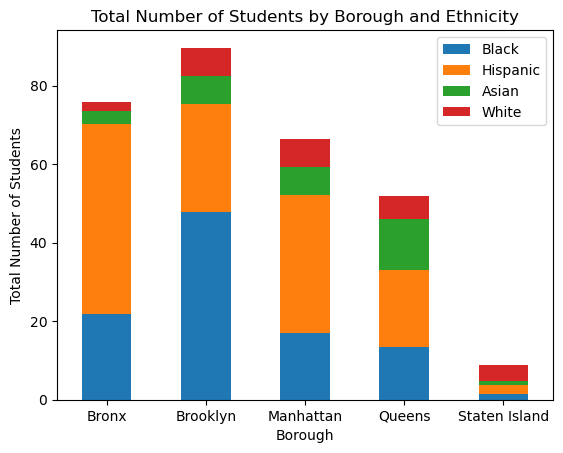

In [59]:
# Group data by borough and ethnicity and sum up the student enrollment
ethnicity_columns = ['Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White']
ethnicity_labels = ['Black', 'Hispanic', 'Asian', 'White']

ethnicity_data = new_data.groupby('Borough')[ethnicity_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
ethnicity_data.plot(kind='bar', stacked=True)
plt.title('Total Number of Students by Borough and Ethnicity')
plt.xlabel('Borough')
plt.ylabel('Total Number of Students')
plt.xticks(rotation=0)
plt.legend(ethnicity_labels)
plt.show()

In [60]:
#This is the beginning of the preprocessing step. In this cell, I'm engineering new features.

# SAT Scores per Student
new_data['SAT Scores per Student'] = new_data['SAT Cumulative Score'] / new_data['Student Enrollment']

# % of High Achievers
high_achiever_threshold = 0.9  # Define the threshold (e.g., top 10%)
new_data['% High Achievers'] = (new_data['SAT Cumulative Score'] >= new_data['SAT Cumulative Score'].quantile(high_achiever_threshold)).astype(int)

# Student Enrollment and School-Pupil Teacher Ratio Interaction
new_data['Enrollment-Ratio Interaction'] = new_data['Student Enrollment'] * new_data['School Pupil-Teacher Ratio']

# Percent Tested and Student Enrollment Interaction
new_data['Tested-Enrollment Interaction'] = new_data['Percent Tested'] * new_data['Student Enrollment']

# Student Diversity Index using Herfindahl-Hirschman Index
ethnicities = ['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']
new_data['Diversity Index'] = (new_data[ethnicities] ** 2).sum(axis=1)

# Assuming each ethnicity with greater than 15% representation gives a diversity score
ethnicity_threshold = 0.15
new_data['Diverse School'] = (new_data[ethnicities] > ethnicity_threshold).all(axis=1).astype(int)

In [61]:
preprocessed_data = new_data

In [62]:
preprocessed_data.drop(['City','State', 'School ID', 'School Name', 'Building Code', 'Street Address', 
                   'Phone Number', 'Start Time', 'End Time'],axis=1,inplace=True)

In [63]:
modeling_df = preprocessed_data

In [64]:
columns_to_drop = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']
modeling_df = modeling_df.drop(columns=columns_to_drop)
print(modeling_df.columns)

Index(['Borough', 'Student Enrollment', 'Percent White', 'Percent Black',
       'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE',
       'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score',
       'SAT Scores per Student', '% High Achievers',
       'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction',
       'Diversity Index', 'Diverse School'],
      dtype='object')


In [65]:
modeling_df = modeling_df.drop(columns=['SAT Scores per Student', '% High Achievers'])

In [66]:
modeling_df = pd.get_dummies(preprocessed_data, columns=['Borough', 'Zip Code'], prefix=['Borough', 'Zip'])


KeyError: "['Zip Code'] not in index"

In [67]:
from sklearn.model_selection import train_test_split


X = modeling_df.drop(columns=['SAT Cumulative Score'])  
y = modeling_df['SAT Cumulative Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = modeling_df.drop('SAT Cumulative Score', axis=1)  # Features
y = modeling_df['SAT Cumulative Score']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

minmax_columns = ['School Pupil-Teacher Ratio', 'Percent White', 'Percent Black', 
                  'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Diverse School']

minmax_scaler = MinMaxScaler()
X_train[minmax_columns] = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test[minmax_columns] = minmax_scaler.transform(X_test[minmax_columns])  

# Columns for Standardization
standardize_columns = ['Student Enrollment', 'GROSS SQUARE FEET', 
                       'TOTAL UNITS', 'Avg total income', 'Enrollment-Ratio Interaction',
                       'Tested-Enrollment Interaction']

standard_scaler = StandardScaler()
X_train[standardize_columns] = standard_scaler.fit_transform(X_train[standardize_columns])
X_test[standardize_columns] = standard_scaler.transform(X_test[standardize_columns])

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to train the model
def train_model(features):
    regressor = LinearRegression()
    
    # Subset training data based on features
    X_train_sub = X_train[features]
    
    # Fit the model
    regressor.fit(X_train_sub, y_train)
    
    return regressor

# Function to evaluate the model
def evaluate_model(model, features):
    # Predictions
    y_train_pred = model.predict(X_train[features])
    y_test_pred = model.predict(X_test[features])
    
    # Evaluation Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return train_mae, test_mae, train_mse, test_mse, train_r2, test_r2

# Feature sets to evaluate
feature_sets = [
    ['School Pupil-Teacher Ratio', 'Avg total income'],
    ['Student Enrollment', 'Percent Tested']
]

# Train and evaluate models for each feature set
for features in feature_sets:
    print(f"Evaluating model with features: {features}")
    
    # Train the model
    model = train_model(features)
    
    # Evaluate the model
    train_mae, test_mae, train_mse, test_mse, train_r2, test_r2 = evaluate_model(model, features)
    
    # Display the results
    print(f"Training MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Training MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Training R^2: {train_r2}")
    print(f"Test R^2: {test_r2}")
    print("-" * 50)

Evaluating model with features: ['School Pupil-Teacher Ratio', 'Avg total income']
Training MAE: 113.5987415629684
Test MAE: 93.08500048319819
Training MSE: 28002.35290586448
Test MSE: 17898.50668296118
Training R^2: 0.31805965828631255
Test R^2: 0.24950689678870874
--------------------------------------------------
Evaluating model with features: ['Student Enrollment', 'Percent Tested']
Training MAE: 102.80538477229926
Test MAE: 99.87968979284894
Training MSE: 21120.116132450876
Test MSE: 19467.906455012377
Training R^2: 0.4856625348300646
Test R^2: 0.18370119992422962
--------------------------------------------------


In [71]:
regressor = LinearRegression()

# Use the new one-hot encoded columns for Borough
borough_encoded_columns = [col for col in X_train.columns if 'Borough_' in col]
selected_features = ['School Pupil-Teacher Ratio'] + borough_encoded_columns

simplified_X_train = X_train[selected_features]
regressor.fit(simplified_X_train, y_train)

simplified_X_test = X_test[selected_features]
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(simplified_X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 119.35489181922574
Test MAE: 86.70075889937898
Training MSE: 30013.077912971163
Test MSE: 16166.432176308037
Training R^2: 0.26909254102126956
Test R^2: 0.32213362451056693


In [72]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Percent Tested'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Percent Tested']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Percent Tested']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Percent Tested' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))



----- Evaluation using 'School Pupil-Teacher Ratio' and 'Percent Tested' -----
Training MAE: 104.48022191743169
Test MAE: 87.76501412693423
Training MSE: 21620.935407154386
Test MSE: 16919.52863940162
Training R^2: 0.4734661001777255
Test R^2: 0.2905559229952446


In [73]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))



----- Evaluation using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction' -----
Training MAE: 112.47517210627686
Test MAE: 76.4930696203487
Training MSE: 26772.781677073228
Test MSE: 15366.575661652258
Training R^2: 0.3480033643292295
Test R^2: 0.35567199776375225


In [74]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction' -----
Training MAE: 112.47517210627686
Test MAE: 76.4930696203487
Training MSE: 26772.781677073228
Test MSE: 15366.575661652258
Training R^2: 0.3480033643292295
Test R^2: 0.35567199776375225


In [75]:

regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Diversity Index']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Diversity Index']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Diversity Index' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio' and 'Diversity Index' -----
Training MAE: 114.23648006552924
Test MAE: 88.4527216374366
Training MSE: 26588.65502526878
Test MSE: 14798.110239279624
Training R^2: 0.35248739437742693
Test R^2: 0.3795080298116601


In [76]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio','Enrollment-Ratio Interaction']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio','Enrollment-Ratio Interaction']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Enrollment-Ratio Interaction' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio' and 'Enrollment-Ratio Interaction' -----
Training MAE: 117.88663163544456
Test MAE: 80.92468458859406
Training MSE: 28938.46241975647
Test MSE: 15552.26696914092
Training R^2: 0.29526261534028064
Test R^2: 0.3478858707943334


In [77]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', and 'Enrollment-Ratio Interaction' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', and 'Enrollment-Ratio Interaction' -----
Training MAE: 99.19274709683046
Test MAE: 82.43773746548109
Training MSE: 20806.341100932914
Test MSE: 16998.796773437618
Training R^2: 0.49330388743118014
Test R^2: 0.2872321715252364


In [78]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', and 'Diversity Index' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', and 'Diversity Index' -----
Training MAE: 96.59443441978308
Test MAE: 81.9883408935996
Training MSE: 18648.075330488577
Test MSE: 14869.571372816657
Training R^2: 0.5458640598550313
Test R^2: 0.3765116296752029


In [79]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', and 'Percent White' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))   


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', and 'Percent White' -----
Training MAE: 88.42258312181673
Test MAE: 82.47159551179844
Training MSE: 15194.584726375046
Test MSE: 15316.457217298532
Training R^2: 0.6299667983138759
Test R^2: 0.3577734885471682


In [80]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['Percent Asian', 'Percent White']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['Percent Asian', 'Percent White']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'Percent Asian', 'Percent White' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))  


----- Evaluation using 'Percent Asian', 'Percent White' -----
Training MAE: 96.09658711680204
Test MAE: 95.31558509025209
Training MSE: 17546.409369424662
Test MSE: 18953.74662026438
Training R^2: 0.5726928932915575
Test R^2: 0.20526017223190074


In [81]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', and 'Percent Asian' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))  


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', and 'Percent Asian' -----
Training MAE: 83.45084735292905
Test MAE: 86.68010890311407
Training MSE: 12971.643862498628
Test MSE: 15617.16668332824
Training R^2: 0.68410200107406
Test R^2: 0.3451645941671422


In [82]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Diverse School']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Diverse School']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio' and 'Diverse School' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio' and 'Diverse School' -----
Training MAE: 118.95118398660799
Test MAE: 85.59343590147218
Training MSE: 29942.026982567226
Test MSE: 15093.094276935568
Training R^2: 0.2708228418971145
Test R^2: 0.36713920543208456


In [83]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diverse School']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diverse School']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', and 'Diverse School' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred)) 


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', and 'Diverse School' -----
Training MAE: 99.34080308297872
Test MAE: 83.02276839899169
Training MSE: 20794.29197162286
Test MSE: 17601.522385703807
Training R^2: 0.4935973194647908
Test R^2: 0.26195959302765737


In [84]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Diverse School', 'Tested-Enrollment Interaction']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Diverse School', 'Tested-Enrollment Interaction']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Diverse School', and 'Tested-Enrollment Interaction' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


----- Evaluation using 'School Pupil-Teacher Ratio', 'Diverse School', and 'Tested-Enrollment Interaction' -----
Training MAE: 112.54781896447314
Test MAE: 77.17431724843786
Training MSE: 26754.53733236357
Test MSE: 16047.16673322974
Training R^2: 0.3484476682313864
Test R^2: 0.327134482630586


In [85]:
# Training the model using 'School Pupil-Teacher Ratio' and 'Tested-Enrollment Interaction'
regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian', 'Diverse School']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian', 'Diverse School']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian', and 'Diverse School' -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))  


----- Evaluation using 'School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction', 'Enrollment-Ratio Interaction', 'Diversity Index', 'Percent White', 'Percent Asian', and 'Diverse School' -----
Training MAE: 82.82962182276907
Test MAE: 88.77483601766082
Training MSE: 12835.043938359153
Test MSE: 17124.98691244702
Training R^2: 0.6874286143504118
Test R^2: 0.28194095753194903


In [86]:
from sklearn.linear_model import Ridge, Lasso

# Set A
simplified_X_train_A = X_train[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']]
simplified_X_test_A = X_test[['School Pupil-Teacher Ratio', 'Tested-Enrollment Interaction']]

# Ridge Regression for Set A
ridgeA = Ridge(alpha=1.0)
ridgeA.fit(simplified_X_train_A, y_train)
y_train_pred_ridgeA = ridgeA.predict(simplified_X_train_A)
y_test_pred_ridgeA = ridgeA.predict(simplified_X_test_A)

# Lasso Regression for Set A
lassoA = Lasso(alpha=1.0)
lassoA.fit(simplified_X_train_A, y_train)
y_train_pred_lassoA = lassoA.predict(simplified_X_train_A)
y_test_pred_lassoA = lassoA.predict(simplified_X_test_A)


# Set B
simplified_X_train_B = X_train[['School Pupil-Teacher Ratio', 'Diversity Index']]
simplified_X_test_B = X_test[['School Pupil-Teacher Ratio', 'Diversity Index']]

# Ridge Regression for Set B
ridgeB = Ridge(alpha=1.0)
ridgeB.fit(simplified_X_train_B, y_train)
y_train_pred_ridgeB = ridgeB.predict(simplified_X_train_B)
y_test_pred_ridgeB = ridgeB.predict(simplified_X_test_B)

# Lasso Regression for Set B
lassoB = Lasso(alpha=1.0)
lassoB.fit(simplified_X_train_B, y_train)
y_train_pred_lassoB = lassoB.predict(simplified_X_train_B)
y_test_pred_lassoB = lassoB.predict(simplified_X_test_B)

In [87]:
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    print("\n----- Evaluation for", model_name, "-----")
    print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
    print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Test MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training R^2:", r2_score(y_train, y_train_pred))
    print("Test R^2:", r2_score(y_test, y_test_pred))

# Evaluating Ridge Regression for Set A
evaluate_model(y_train, y_train_pred_ridgeA, y_test, y_test_pred_ridgeA, "Ridge Regression Set A")

# Evaluating Lasso Regression for Set A
evaluate_model(y_train, y_train_pred_lassoA, y_test, y_test_pred_lassoA, "Lasso Regression Set A")

# Evaluating Ridge Regression for Set B
evaluate_model(y_train, y_train_pred_ridgeB, y_test, y_test_pred_ridgeB, "Ridge Regression Set B")

# Evaluating Lasso Regression for Set B
evaluate_model(y_train, y_train_pred_lassoB, y_test, y_test_pred_lassoB, "Lasso Regression Set B")


----- Evaluation for Ridge Regression Set A -----
Training MAE: 112.18627618513092
Test MAE: 76.52405073156436
Training MSE: 26832.190768053762
Test MSE: 15591.31379787852
Training R^2: 0.34655657677032836
Test R^2: 0.34624861824645803

----- Evaluation for Lasso Regression Set A -----
Training MAE: 112.18082844077921
Test MAE: 76.46190900318096
Training MSE: 26803.031289471455
Test MSE: 15492.871729883895
Training R^2: 0.34726669655402864
Test R^2: 0.35037634210658075

----- Evaluation for Ridge Regression Set B -----
Training MAE: 112.95359119921665
Test MAE: 85.56733960671772
Training MSE: 26716.638927364533
Test MSE: 14660.341637710986
Training R^2: 0.349370606790954
Test R^2: 0.38528473437968724

----- Evaluation for Lasso Regression Set B -----
Training MAE: 113.36751382537511
Test MAE: 86.37545236213354
Training MSE: 26641.18188786237
Test MSE: 14653.48837228359
Training R^2: 0.3512082094908341
Test R^2: 0.38557209513714275


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameters and their values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train[['School Pupil-Teacher Ratio', 'Diversity Index']], y_train)

print("Best Hyperparameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(-grid_search.best_score_))

# Use the best model to make predictions
best_lasso = grid_search.best_estimator_
y_train_pred = best_lasso.predict(X_train[['School Pupil-Teacher Ratio', 'Diversity Index']])
y_test_pred = best_lasso.predict(X_test[['School Pupil-Teacher Ratio', 'Diversity Index']])

# Evaluate the performance
print("\nTraining MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))




Best Hyperparameters: {'alpha': 0.1}
Best Score: 27642.72487884048

Training MAE: 114.13661247127231
Test MAE: 88.21926270871148
Training MSE: 26589.18014488406
Test MSE: 14779.254443059375
Training R^2: 0.35247460615741233
Test R^2: 0.38029866253144595


In [89]:
# Using the best model from GridSearchCV
coefficients = best_lasso.coef_

# Creating a DataFrame for better visualization
features = ['School Pupil-Teacher Ratio', 'Diversity Index']
coeff_df = pd.DataFrame(list(zip(features, coefficients)), columns=['Feature', 'Coefficient'])

print(coeff_df)

                      Feature  Coefficient
0  School Pupil-Teacher Ratio   459.211812
1             Diversity Index  -374.125045


In [90]:
print(X_train.dtypes)

Borough                           object
Student Enrollment               float64
Percent White                    float64
Percent Black                    float64
Percent Hispanic                 float64
Percent Asian                    float64
Percent Tested                   float64
Avg total income                 float64
TOTAL UNITS                      float64
GROSS SQUARE FEET                float64
SALE PRICE                       float64
Avg_price_sqft                   float64
School Pupil-Teacher Ratio       float64
Enrollment-Ratio Interaction     float64
Tested-Enrollment Interaction    float64
Diversity Index                  float64
Diverse School                   float64
dtype: object


In [91]:
X_train = pd.get_dummies(X_train, columns=['Borough'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Borough'], drop_first=True)


In [92]:
print(X_train.isnull().sum())

Student Enrollment               0
Percent White                    0
Percent Black                    0
Percent Hispanic                 0
Percent Asian                    0
Percent Tested                   0
Avg total income                 0
TOTAL UNITS                      0
GROSS SQUARE FEET                0
SALE PRICE                       0
Avg_price_sqft                   0
School Pupil-Teacher Ratio       0
Enrollment-Ratio Interaction     0
Tested-Enrollment Interaction    0
Diversity Index                  0
Diverse School                   0
Borough_Brooklyn                 0
Borough_Manhattan                0
Borough_Queens                   0
Borough_Staten Island            0
dtype: int64


In [93]:
print(np.isinf(X_train).sum())

Student Enrollment                0
Percent White                     0
Percent Black                     0
Percent Hispanic                  0
Percent Asian                     0
Percent Tested                    0
Avg total income                  0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
SALE PRICE                        0
Avg_price_sqft                   24
School Pupil-Teacher Ratio        0
Enrollment-Ratio Interaction      0
Tested-Enrollment Interaction     0
Diversity Index                   0
Diverse School                    0
Borough_Brooklyn                  0
Borough_Manhattan                 0
Borough_Queens                    0
Borough_Staten Island             0
dtype: int64


In [94]:
print(np.isnan(X_test).sum())
print(np.isinf(X_test).sum())

Student Enrollment               0
Percent White                    0
Percent Black                    0
Percent Hispanic                 0
Percent Asian                    0
Percent Tested                   0
Avg total income                 0
TOTAL UNITS                      0
GROSS SQUARE FEET                0
SALE PRICE                       0
Avg_price_sqft                   0
School Pupil-Teacher Ratio       0
Enrollment-Ratio Interaction     0
Tested-Enrollment Interaction    0
Diversity Index                  0
Diverse School                   0
Borough_Brooklyn                 0
Borough_Manhattan                0
Borough_Queens                   0
Borough_Staten Island            0
dtype: int64
Student Enrollment               0
Percent White                    0
Percent Black                    0
Percent Hispanic                 0
Percent Asian                    0
Percent Tested                   0
Avg total income                 0
TOTAL UNITS                      0
GROSS S

In [95]:
# Fill NaN values in 'Avg_price_sqft' column in X_train with its mean
X_train['Avg_price_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_train['Avg_price_sqft'].fillna(X_train['Avg_price_sqft'].mean(), inplace=True)

# Fill NaN values in 'Avg_price_sqft' column in X_test with its mean (use X_train's mean for consistency)
X_test['Avg_price_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_test['Avg_price_sqft'].fillna(X_train['Avg_price_sqft'].mean(), inplace=True)

In [96]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train) 

# Predict on the training and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print the evaluation metrics for both training and test sets
print("\n----- Random Forest Evaluation -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))
print("Training MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_rf))
print("Training R^2:", r2_score(y_train, y_train_pred_rf))
print("Test R^2:", r2_score(y_test, y_test_pred_rf))


----- Random Forest Evaluation -----
Training MAE: 29.04707184047267
Test MAE: 75.95137669020211
Training MSE: 1568.2171877982225
Test MSE: 14029.704479831356
Training R^2: 0.9618092605102327
Test R^2: 0.411727657579978


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3, 
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 73,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=73; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=73; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=94; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=94; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_fea

In [100]:
best_rf = rf_random.best_estimator_

y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

In [101]:
# Use the best estimator to predict on the training and test sets
best_rf = rf_random.best_estimator_

y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Calculate and display the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n----- Random Forest with Best Hyperparameters Evaluation -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))
print("Training MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_rf))
print("Training R^2:", r2_score(y_train, y_train_pred_rf))
print("Test R^2:", r2_score(y_test, y_test_pred_rf))


----- Random Forest with Best Hyperparameters Evaluation -----
Training MAE: 27.173650282030614
Test MAE: 76.9892694063927
Training MSE: 1432.545747779314
Test MSE: 13124.72575530118
Training R^2: 0.9651132624445811
Test R^2: 0.4496738562960646


In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

print("\n----- Gradient Boosting Evaluation -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred_gb))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_gb))
print("Training MSE:", mean_squared_error(y_train, y_train_pred_gb))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_gb))
print("Training R^2:", r2_score(y_train, y_train_pred_gb))
print("Test R^2:", r2_score(y_test, y_test_pred_gb))


----- Gradient Boosting Evaluation -----
Training MAE: 21.650404671869918
Test MAE: 79.44245432452456
Training MSE: 766.4745412195549
Test MSE: 14701.78944937127
Training R^2: 0.9813340717363561
Test R^2: 0.3835468074483944


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 1. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Set up KNN regressor and GridSearchCV for hyperparameter tuning
knn = KNeighborsRegressor()

# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_neighbors': range(1,31),  # You can change the range based on your preference
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters: ", grid_search.best_params_)

# 3. Train KNN with the best parameters and make predictions
best_knn = grid_search.best_estimator_
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Display the evaluation metrics
print("\n----- KNN Evaluation -----")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

----- KNN Evaluation -----
Training MAE: 0.0
Test MAE: 83.64461293039605
Training MSE: 0.0
Test MSE: 14281.912586323711
Training R^2: 1.0
Test R^2: 0.4011524488293686


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
lin_reg = LinearRegression()

# Perform k-fold cross-validation (let's assume k=5 for this example)
scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='r2')  # for R^2
print("R^2 for each fold:", scores)
print("Mean R^2:", scores.mean())
print("Std R^2:", scores.std())

# You can similarly compute cross-validated metrics for MSE or MAE by changing the 'scoring' parameter
mse_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nNegative MSE for each fold:", mse_scores)
print("Mean Negative MSE:", mse_scores.mean())
print("Std Negative MSE:", mse_scores.std())




R^2 for each fold: [0.74263963 0.47306598 0.66593018 0.66488597 0.71023562]
Mean R^2: 0.6513514764858449
Std R^2: 0.09378945646672339

Negative MSE for each fold: [-10857.76534505  -9283.46667227 -14778.21378512 -18908.06024149
 -12479.36388463]
Mean Negative MSE: -13261.373985712295
Std Negative MSE: 3358.526151105917


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
lin_reg = LinearRegression()

# Perform k-fold cross-validation (let's assume k=5 for this example)
scores = cross_val_score(lin_reg, X_train, y_train, cv=6, scoring='r2')  # for R^2
print("R^2 for each fold:", scores)
print("Mean R^2:", scores.mean())
print("Std R^2:", scores.std())

# You can similarly compute cross-validated metrics for MSE or MAE by changing the 'scoring' parameter
mse_scores = cross_val_score(lin_reg, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
print("\nNegative MSE for each fold:", mse_scores)
print("Mean Negative MSE:", mse_scores.mean())
print("Std Negative MSE:", mse_scores.std())

R^2 for each fold: [0.75519232 0.48791638 0.6814886  0.71273474 0.59076381 0.74778942]
Mean R^2: 0.6626475458697522
Std R^2: 0.09519772373049731

Negative MSE for each fold: [-11142.59526617  -8863.95759356 -13174.07225073 -14682.47211273
 -14474.06934038 -12374.78153587]
Mean Negative MSE: -12451.99134990648
Std Negative MSE: 2007.4739664726105


In [112]:
X_C = modeling_df[['School Pupil-Teacher Ratio', 'Diversity Index']]
y_C = modeling_df['SAT Cumulative Score']

In [113]:
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size=0.2, random_state=42)

In [114]:
from sklearn.model_selection import cross_val_score

lm_C = LinearRegression()

# Compute R^2 for each cross-validated fold
r2_scores_C = cross_val_score(lm_C, X_train_C, y_train_C, cv=6, scoring='r2')
print("R^2 for each fold:", r2_scores_C)
print("Mean R^2:", r2_scores_C.mean())
print("Std R^2:", r2_scores_C.std())

# Compute negative MSE for each cross-validated fold
neg_mse_scores_C = cross_val_score(lm_C, X_train_C, y_train_C, cv=6, scoring='neg_mean_squared_error')
print("\nNegative MSE for each fold:", neg_mse_scores_C)
print("Mean Negative MSE:", neg_mse_scores_C.mean())
print("Std Negative MSE:", neg_mse_scores_C.std())

R^2 for each fold: [0.48003202 0.28253553 0.32390898 0.12480743 0.18316255 0.44306223]
Mean R^2: 0.3062514555145978
Std R^2: 0.12771316914619765

Negative MSE for each fold: [-23666.71169053 -12419.01579081 -27964.06056453 -44732.14217685
 -28890.3141167  -27326.30522284]
Mean Negative MSE: -27499.758260375238
Std Negative MSE: 9497.85417046382


In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the hyperparameters and their possible values
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize Ridge regression model
ridge = Ridge()

# Use GridSearchCV to find the best hyperparameters using 6-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_ridge = grid_search.best_estimator_

# Predictions using the best model
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# Evaluation
evaluate_model(y_train, y_train_pred, y_test, y_test_pred, "Ridge Regression Set B with Hyperparameter Tuning")







/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th


----- Evaluation for Ridge Regression Set B with Hyperparameter Tuning -----
Training MAE: 75.33783714298012
Test MAE: 94.89548614648557
Training MSE: 10377.084026210017
Test MSE: 17154.29407281817
Training R^2: 0.7472872279477887
Test R^2: 0.2807120940226713


/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was depreca

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline that first scales the data and then applies Ridge regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Adjust the hyperparameter grid to match the pipeline structure
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Use GridSearchCV with the pipeline
grid_search = GridSearchCV(pipe, param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best pipeline from grid search
best_pipeline = grid_search.best_estimator_

# Predictions using the best pipeline
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Evaluation
evaluate_model(y_train, y_train_pred, y_test, y_test_pred, "Ridge Regression Set B with Hyperparameter Tuning")


----- Evaluation for Ridge Regression Set B with Hyperparameter Tuning -----
Training MAE: 75.29605599941272
Test MAE: 95.53353847367647
Training MSE: 10303.459369100572
Test MSE: 17405.206618574033
Training R^2: 0.7490802067019867
Test R^2: 0.270191208764784


In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values
alphas = np.logspace(-4, 4, 50)

# Set up the grid search parameters
param_grid = {"alpha": alphas}

# Set up Lasso regression
lasso = Lasso(normalize=True)

# Initialize the grid search
grid = GridSearchCV(lasso, param_grid, cv=6, scoring='r2', return_train_score=True)

# Fit the model
grid.fit(X_train, y_train)

# Results:
print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

# Evaluate on the test set
y_pred = grid.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test set R^2:", test_r2)

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Best cross-validation score: 0.6683915943532055
Best parameters: {'alpha': 0.040949150623804234}
Test set R^2: 0.3137062694114676


/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define a range of alpha values
alphas = np.logspace(-4, 4, 50)

# Set up the grid search parameters
param_grid = {"lasso__alpha": alphas}

# Create a pipeline that first standard scales the data then applies Lasso
pipeline = make_pipeline(StandardScaler(), Lasso())

# Initialize the grid search
grid = GridSearchCV(pipeline, param_grid, cv=6, scoring='r2', return_train_score=True)

# Fit the model
grid.fit(X_train, y_train)

# Results:
print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

# Evaluate on the test set
y_pred = grid.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test set R^2:", test_r2)





/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+06, tolerance: 7.881e+02

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+06, tolerance: 9.006e+02

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.959e+05, tolerance: 8.101e+02

/Users/chrislele/op

Best cross-validation score: 0.6683842651699096
Best parameters: {'lasso__alpha': 0.5689866029018293}
Test set R^2: 0.3120181046833391
